<a href="https://colab.research.google.com/github/Grazipolachini/MBA/blob/main/ModeloMachineLearningInvestTrabalhoFinalMBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 1. Bibliotecas
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#montando o drive no colab
from google.colab import drive
drive.mount('/content/drive')

#Atribui o caminho do csv a uma variável
csv_path = '/content/drive/MyDrive/base_clientes_investidores_ruido.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [7]:

#importa o arquivo para a biblioteca pandas
import pandas as pd

df = pd.read_csv(csv_path)
print(df.shape)
df.head(5)

(150000, 10)


,cliente_id,idade,patrimonio_total,valor_medio_investido,numero_investimentos,tempo_como_cliente_anos,frequencia_transacoes_mensal,score_risco,diversificacao_carteira,categoria_cliente
0,1,56.0,509267.58,157169.11,6,16,2.5,0.77,6,silver
1,2,69.0,1047824.15,57329.58,2,6,1.9,0.82,7,silver
2,3,46.0,240798.33,137171.10,4,16,0.2,NaN,5,standard
3,4,32.0,NaN,257471.98,5,4,4.0,0.03,1,standard
4,5,60.0,390954.90,362964.71,6,14,2.7,0.87,4,silver


In [9]:
#Preparo dos dados
Variaveis = ['cliente_id','idade','patrimonio_total','valor_medio_investido','numero_investimentos',
 'tempo_como_cliente_anos','frequencia_transacoes_mensal','score_risco','diversificacao_carteira']

#retira campos nulos caso houver
df = df[df["categoria_cliente"].notnull()]

X = df[Variaveis].copy()
y = df["categoria_cliente"]

In [10]:
#Label Encoding nas colunas categóricas
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col])

#Separação dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, stratify=y, random_state=42
)

In [13]:
# Modelo com Random Forest ajustado
clf = RandomForestClassifier(
    n_estimators=50,         # 50 árvores de decisão
    max_depth=10,             # limitar profundidade da árvore
    min_samples_split=10,     # mínimo para split
    min_samples_leaf=4,       # mínimo por folha
    random_state=42,
    n_jobs=-1                 # usa todos os núcleos para treinar
)
clf.fit(X_train, y_train)

# Previsão e avaliação
y_pred = clf.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))



Relatório de Classificação:
              precision    recall  f1-score   support

       black       1.00      0.96      0.98       483
     diamond       1.00      0.02      0.03        59
        gold       0.96      0.61      0.74      3837
      silver       0.91      0.97      0.94     29566
    standard       0.95      0.93      0.94     18555

    accuracy                           0.93     52500
   macro avg       0.96      0.70      0.73     52500
weighted avg       0.93      0.93      0.92     52500



In [14]:
# Ver distribuição das classes no treino e teste
print("Distribuição no treino:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição no teste:")
print(y_test.value_counts(normalize=True))

Distribuição no treino:
categoria_cliente
silver      0.563169
standard    0.353426
gold        0.073087
black       0.009190
diamond     0.001128
Name: proportion, dtype: float64

Distribuição no teste:
categoria_cliente
silver      0.563162
standard    0.353429
gold        0.073086
black       0.009200
diamond     0.001124
Name: proportion, dtype: float64


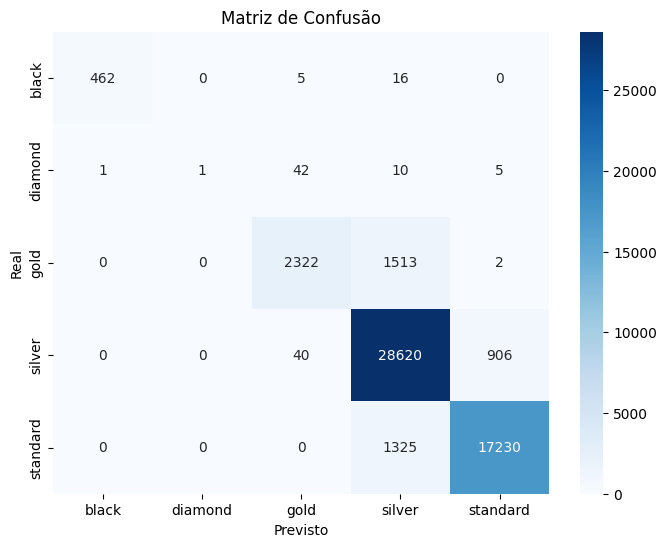

In [15]:
# 7. Matriz de Confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


In [ ]:
#Validação cruzada (K-fold = 5)
print("\nValidação cruzada (5-fold):")
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Acurácias:", np.round(scores, 4))
print("Acurácia média:", round(np.mean(scores), 4))


Validação cruzada (5-fold):
